<a href="https://colab.research.google.com/github/chandanareddy606/Gender_Detection/blob/main/Gender_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
4/3wGO3Zsb74qJK0oeWijs-2zlQdrHFsbGvR8ez9zDPTNESygN7jpkRHo
Mounted at /content/drive


Importing libraries

In [ ]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator ,load_img,img_to_array


 load image files from the dataset

In [ ]:
directory=r'/content/drive/My Drive/Cnn/Gender classification' # dataset diretory
categories =os.listdir(directory)  #List of images in the directory
categories


['man', 'woman']

create groud-truth label from the image path

In [ ]:
directory=r'/content/drive/My Drive/Cnn/Gender classification'
data=[]
labels=[]  

for category in categories:
    path=os.path.join(directory,category)
    for img in os.listdir(path):
        img_path=os.path.join(path,img)
        image=load_img(img_path,target_size=(224,224,3))
        image=img_to_array(image)
        image=image/255.0      #normalization
        
   
        data.append(image)
        labels.append(category)
 

In [ ]:
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.preprocessing import LabelBinarizer


In [ ]:
lb=LabelBinarizer()
labels=lb.fit_transform(labels)
labels=to_categorical(labels)


pre-processing

In [ ]:
data=np.array(data)
labels=np.array(labels)

In [ ]:

path='/content/drive/My Drive/Cnn/Gender classification'

man=path+ '/man'
woman=path+ '/woman'

print("length of the data of man {}".format(len(os.listdir(man))))
print("lenght of the data of women {}".format(len(os.listdir(woman))))

length of the data of man 1173
lenght of the data of women 1134


In [ ]:
datagen=ImageDataGenerator()
gender=datagen.flow_from_directory(directory=path)


Found 2307 images belonging to 2 classes.


In [ ]:
gender.class_indices

{'man': 0, 'woman': 1}

Visualization

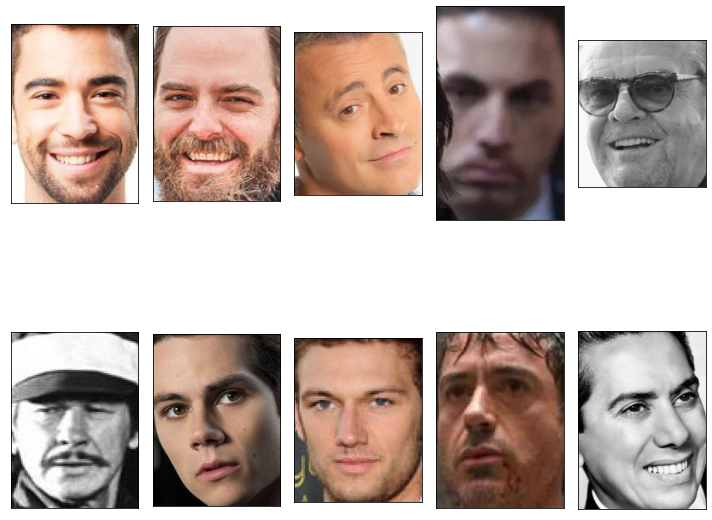

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for a,b in enumerate(gender.filepaths[:10]):
  plt.subplot(2,5,a+1)
  img=load_img(b)
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()
plt.show() 
  

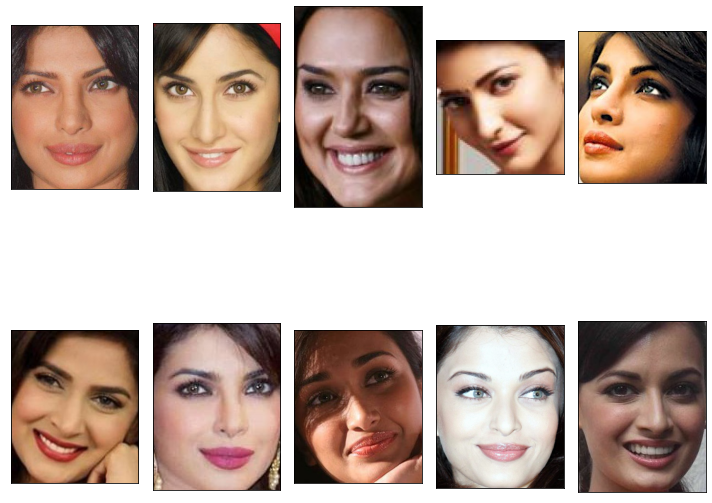

In [ ]:
plt.figure(figsize=(10,10))
for a,b in enumerate(gender.filepaths[-10:]):
  plt.subplot(2,5,a+1)
  img=load_img(b)
  plt.imshow(img)
  plt.xticks([])
  plt.yticks([])
plt.tight_layout()
plt.show()

 split dataset for train and test

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,labels,random_state=23,test_size=0.25,stratify=labels,shuffle=True)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1730, 224, 224, 3)
(577, 224, 224, 3)
(1730, 2)
(577, 2)


In [ ]:
from tensorflow.keras.layers import BatchNormalization, Conv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras.models import Sequential

Build the model

In [ ]:
 
 def build_model():
    model=Sequential()
    model.add(Conv2D(32, (3,3), padding="same", input_shape=(224,224,3)))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(3,3)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
   
    model.add(Conv2D(64, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    

    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
  
    model.add(Conv2D(128, (3,3), padding="same"))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))
    

    model.add(Flatten())
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    model.add(Dense(2))
    model.add(Activation("sigmoid"))

    

    loss=tf.keras.losses.binary_crossentropy
    opt=tf.keras.optimizers.Adam(learning_rate=0.001)

    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])
    return model

In [ ]:
model=build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 74, 74, 64)        0

augmenting dataset 

In [ ]:
aug = ImageDataGenerator(rotation_range=25, width_shift_range=0.1,
                         height_shift_range=0.1, shear_range=0.2, zoom_range=0.2,
                         horizontal_flip=True, fill_mode="nearest")


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

Accuracy_Threshold=0.97
class mycallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self,epoch,logs={}):
    if (logs.get('accuracy')> Accuracy_Threshold):
      print("\nReached %2.2f%% accuracy, so stop training" %(Accuracy_Threshold*100))
      self.model.stop_training=True

callback=mycallback()


In [ ]:
bs=32
History = model.fit_generator(aug.flow(X_train,y_train, batch_size=bs),
                        validation_data=(X_test,y_test),
                        steps_per_epoch=len(X_train) // bs,
                        epochs=250, verbose=1,callbacks=[callback])


Instructions for updating:
Please use Model.fit, which supports generators.


Instructions for updating:
Please use Model.fit, which supports generators.


Epoch 1/250
 2/54 [>.............................] - ETA: 1s - loss: 1.2645 - accuracy: 0.5625WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0286s vs `on_train_batch_end` time: 0.0430s). Check your callbacks.


54/54 [==============================] - 19s 347ms/step - loss: 0.6191 - accuracy: 0.7709 - val_loss: 0.6320 - val_accuracy: 0.8059
Epoch 2/250
54/54 [==============================] - 19s 343ms/step - loss: 0.4755 - accuracy: 0.8251 - val_loss: 0.8379 - val_accuracy: 0.5078
Epoch 3/250
54/54 [==============================] - 19s 344ms/step - loss: 0.4684 - accuracy: 0.8198 - val_loss: 0.9317 - val_accuracy: 0.5269
Epoch 4/250
54/54 [==============================] - 19s 348ms/step - loss: 0.3814 - accuracy: 0.8657 - val_loss: 0.6476 - val_accuracy: 0.6222
Epoch 5/250
54/54 [==============================] - 19s 343ms/step - loss: 0.3164 - accuracy: 0.8781 - val_loss: 0.4265 - val_accuracy: 0.8146
Epoch 6/250
54/54 [==============================] - 19s 343ms/step - loss: 0.3028 - accuracy: 0.8840 - val_loss: 0.3744 - val_accuracy: 0.8666
Epoch 7/250
54/54 [==============================] - 19s 345ms/step - loss: 0.3205 - accuracy: 0.8763 - val_loss: 0.4149 - val_accuracy: 0.8146
Epoc

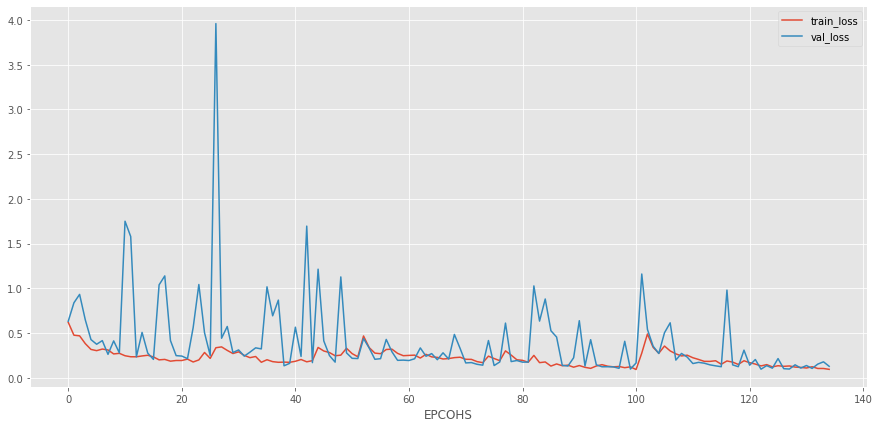

In [ ]:
N=135

plt.style.use('ggplot')
plt.figure(figsize=(15,7))
plt.plot(np.arange(0,N),History.history['loss'],label='train_loss')
plt.plot(np.arange(0,N),History.history['val_loss'],label='val_loss')

plt.xlabel("EPCOHS")
plt.legend()
plt.show()

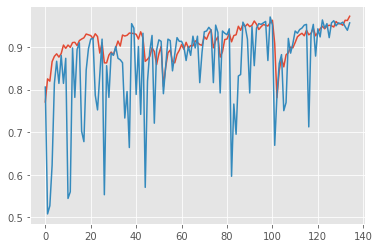

In [ ]:
plt.plot(np.arange(0,N),History.history['accuracy'],label='accuracy')
plt.plot(np.arange(0,N),History.history['val_accuracy'],label='val_acc')

In [ ]:
pred=model.predict(X_test,batch_size=bs)

In [ ]:
#Finding highest probabilities
pred=np.argmax(pred,axis=1)


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test.argmax(axis=1),pred,target_names=lb.classes_))

              precision    recall  f1-score   support

         man       0.99      0.93      0.96       293
       woman       0.93      0.99      0.96       284

    accuracy                           0.96       577
   macro avg       0.96      0.96      0.96       577
weighted avg       0.96      0.96      0.96       577



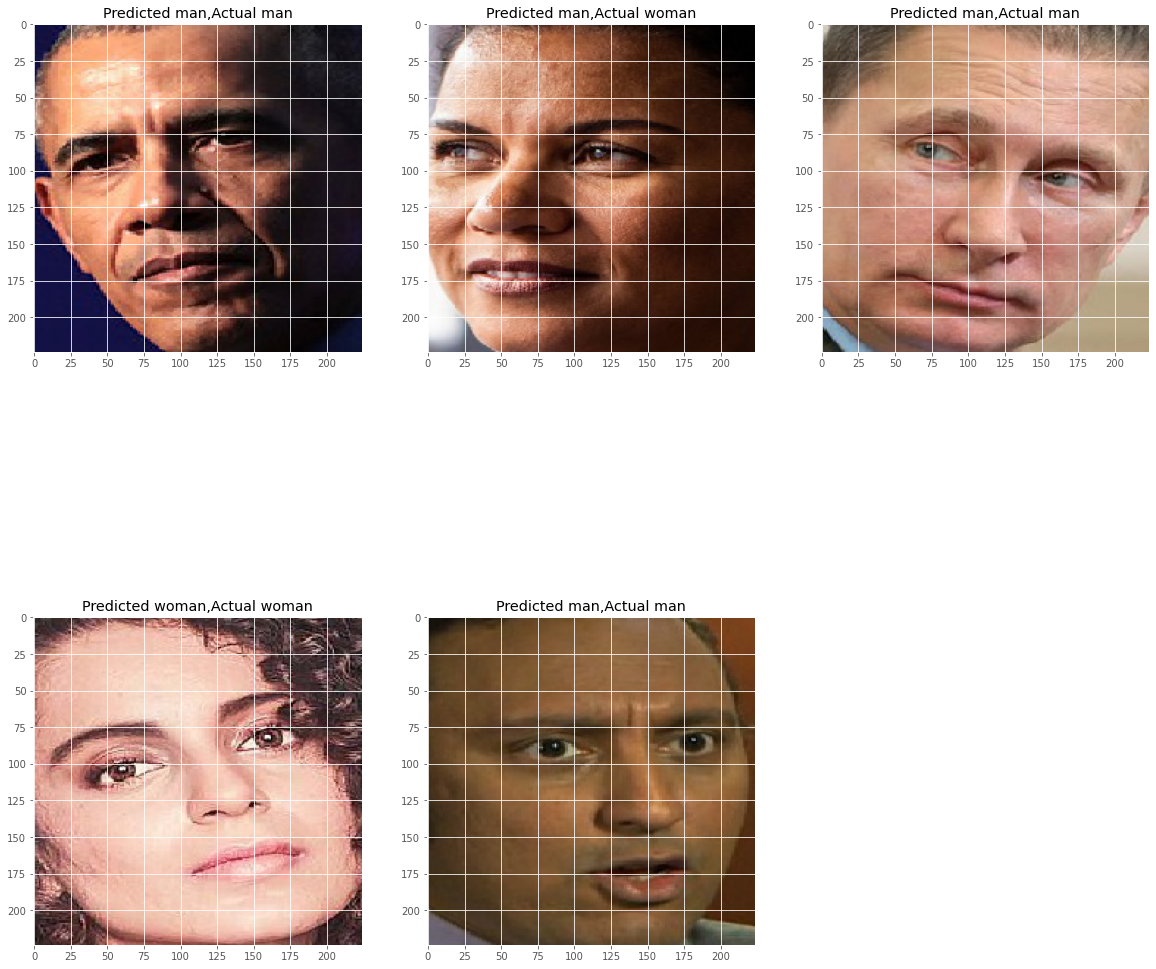

In [ ]:
import random
res = ["man","woman"]
plt.figure(figsize=(20,20))
for a,b in enumerate(range(5)):
  plt.subplot(2,3,a+1)
  im = random.randint(1,500)
  plt.imshow(X_test[im])
  plt.title("Predicted {},Actual {}".format(res[pred[im]],res[np.argmax(y_test[im])] ))


In [ ]:
#Finally saving our model as Gender_detector.model, saving it in h5 format


print("Saving Gender detector....")
model.save("Gender_Detector.model",save_format='h5')
print("\n Saved")



Saving Gender detector....

 Saved


In [ ]:
from tensorflow.keras.models import load_model


In [ ]:
model=load_model('/content/drive/My Drive/Cnn/Gender_Detector.model')

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 32)      896       
_________________________________________________________________
activation (Activation)      (None, 224, 224, 32)      0         
_________________________________________________________________
batch_normalization (BatchNo (None, 224, 224, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 74, 74, 64)        18496     
_________________________________________________________________
activation_1 (Activation)    (None, 74, 74, 64)        0

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
import cv2
import numpy as np


In [ ]:
from PIL import Image

In [ ]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [ ]:
def predictions(image):
  res=['women','man']
  img=load_img(filename,target_size=(224,224,3))
  img=img_to_array(img)
  img=img/255.0
  img=np.expand_dims(img,axis=0)
  img_pred=model.predict(img)
  img_pred=np.argmax(img_pred)

  return res[img_pred]

 

    


In [ ]:
predictions(filename)

'man'